In [119]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [120]:
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
%matplotlib inline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline

In [121]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [122]:
train.shape



(1460, 81)

In [123]:
test.shape

(1459, 80)

In [125]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [126]:
#target variable
train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

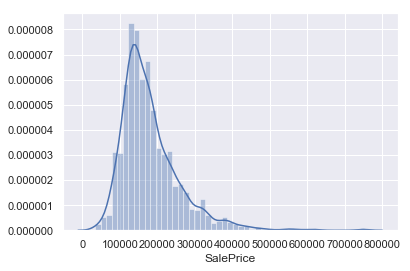

In [127]:
#histogram for SalePrice
sns.distplot(train['SalePrice'])
plt.show()

In [128]:
train.SalePrice.skew()

1.8828757597682129

In [129]:
print("Kurtosis : %f " % train['SalePrice'].kurt())

Kurtosis : 6.536282 


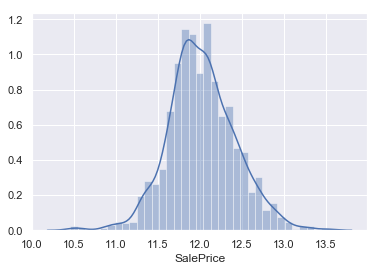

In [130]:
#using log transformation
target = np.log(train.SalePrice)
sns.distplot(target)
plt.show()

In [131]:
print("Skew: %f" % target.skew())

Skew: 0.121335


In [132]:
print("Kurtosis : %f" % target.kurt())

Kurtosis : 0.809532


In [133]:
#data_types
numeric_features = train.select_dtypes(include=[np.number])
numeric_features.dtypes

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

In [134]:
corr = numeric_features.corr()

In [135]:
print(corr['SalePrice'].sort_values(ascending = False)[:5] ,'\n')
print(corr['SalePrice'].sort_values(ascending = False)[-5:])


SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64 

YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


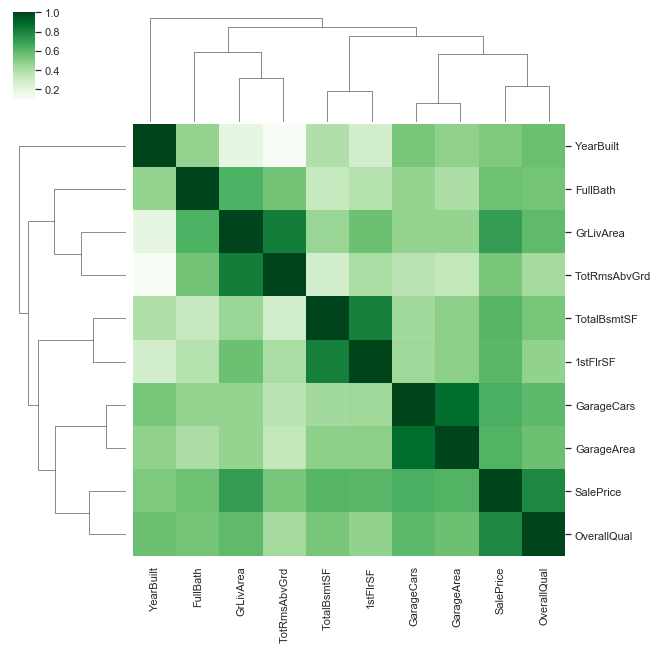

In [136]:
#correlation matric
k = 10
cols = corr.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale = 1.00)
hm = sns.clustermap(cm, cmap = "Greens", cbar = True, square = True, 
                    yticklabels = cols.values,  xticklabels = cols.values)

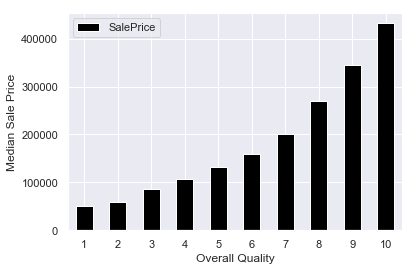

In [137]:
quality = train.pivot_table(index= 'OverallQual', values = 'SalePrice', aggfunc=np.median)
quality.plot(kind = 'bar', color ="black")
plt.xlabel('Overall Quality')
plt.ylabel('Median Sale Price')
plt.xticks(rotation = 0)
plt.show()


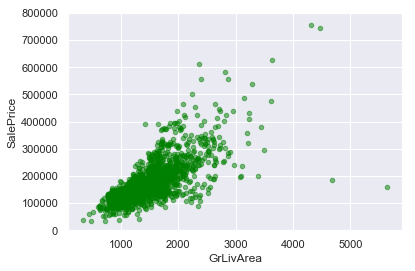

In [138]:
GLA = pd.concat([train['SalePrice'], train['GrLivArea']], axis = 1)
GLA.plot.scatter(x ='GrLivArea', y= 'SalePrice', ylim = (0,800000), c= 'green', alpha = 0.5)

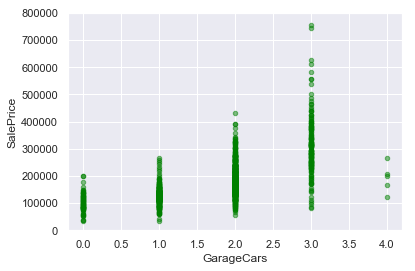

In [139]:
GC = pd.concat([train['SalePrice'], train['GarageCars']], axis = 1)
GC.plot.scatter(x ='GarageCars', y= 'SalePrice', ylim = (0,800000), c= 'green', alpha = 0.5)

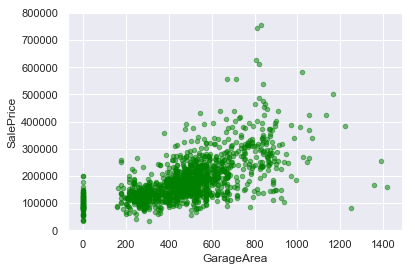

In [140]:
GA = pd.concat([train['SalePrice'], train['GarageArea']], axis = 1)
GA.plot.scatter(x ='GarageArea', y= 'SalePrice', ylim = (0,800000), c= 'green', alpha = 0.5)

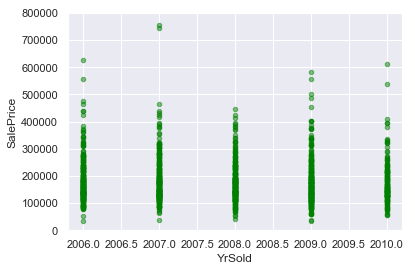

In [141]:
YS = pd.concat([train['SalePrice'], train['YrSold']], axis = 1)
YS.plot.scatter(x ='YrSold', y= 'SalePrice', ylim = (0,800000), c= 'green', alpha = 0.5)

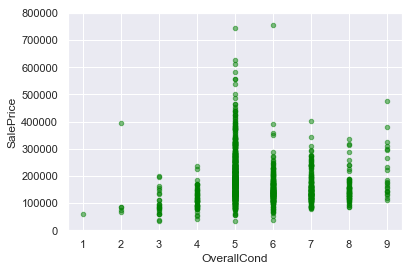

In [142]:
OC = pd.concat([train['SalePrice'], train['OverallCond']], axis = 1)
OC.plot.scatter(x ='OverallCond', y= 'SalePrice', ylim = (0,800000), c= 'green', alpha = 0.5)

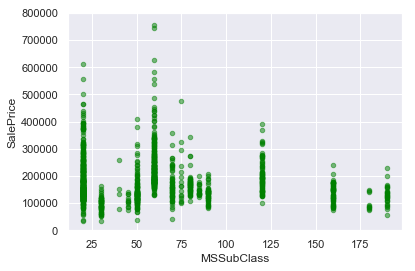

In [143]:
MS = pd.concat([train['SalePrice'], train['MSSubClass']], axis = 1)
MS.plot.scatter(x ='MSSubClass', y= 'SalePrice', ylim = (0,800000), c= 'green', alpha = 0.5)

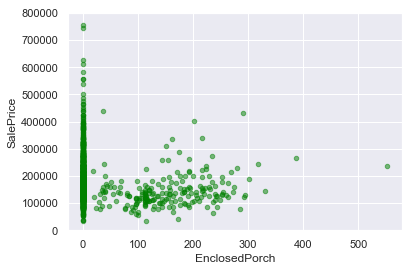

In [144]:
EP = pd.concat([train['SalePrice'], train['EnclosedPorch']], axis = 1)
EP.plot.scatter(x ='EnclosedPorch', y= 'SalePrice', ylim = (0,800000), c= 'green', alpha = 0.5)

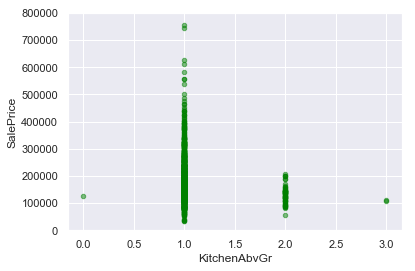

In [145]:
KG = pd.concat([train['SalePrice'], train['KitchenAbvGr']], axis = 1)
KG.plot.scatter(x ='KitchenAbvGr', y= 'SalePrice', ylim = (0,800000), c= 'green', alpha = 0.5)

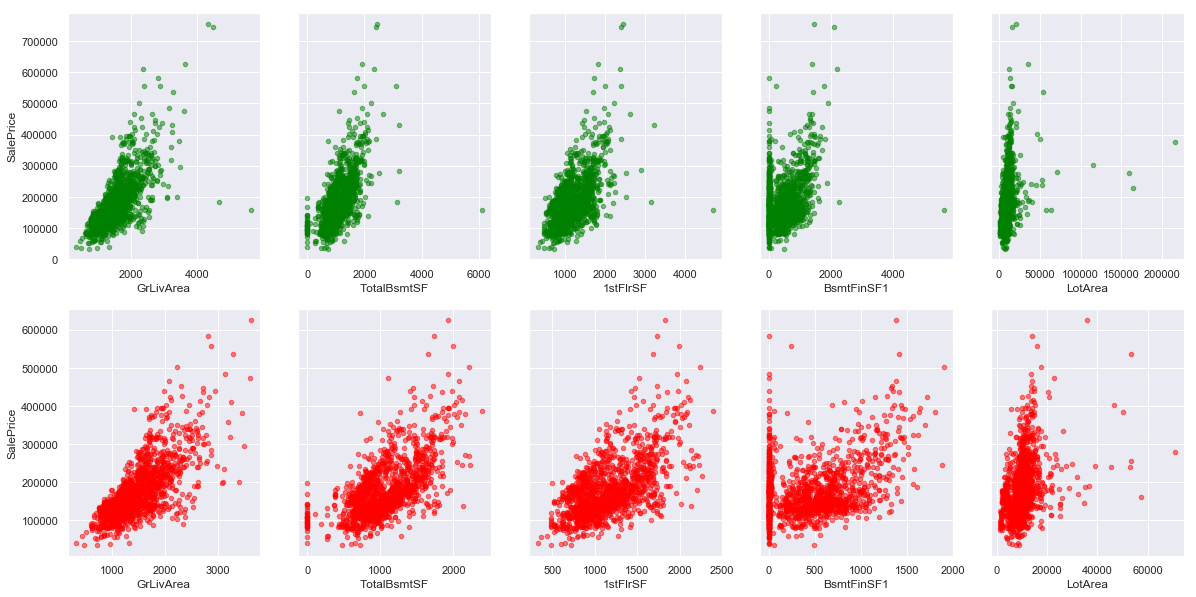

In [146]:
fig, axes = plt.subplots(ncols=5, nrows=2, figsize=(20, 10))
axes = np.ravel(axes)
col_name = ['GrLivArea','TotalBsmtSF','1stFlrSF','BsmtFinSF1','LotArea']
for i, c in zip(range(5), col_name):
    train.plot.scatter(ax=axes[i], x=c, y='SalePrice', sharey=True, colorbar=False, color='green', alpha = 0.5)

# delete outliers
train = train[train['GrLivArea'] < 4000]
train = train[train['LotArea'] < 100000]
train = train[train['TotalBsmtSF'] < 3000]
train = train[train['1stFlrSF'] < 2500]
train = train[train['BsmtFinSF1'] < 2000]

    
for i, c in zip(range(5,10), col_name):
    train.plot.scatter(ax=axes[i], x=c, y='SalePrice', sharey=True, colorbar=False, color='red', alpha = 0.5)


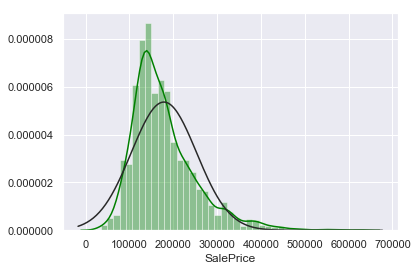

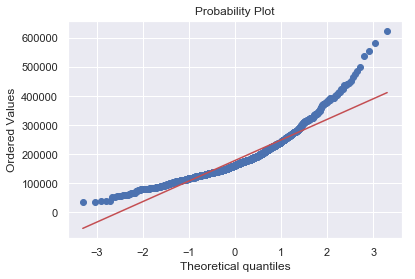

In [147]:
#histogram and probability plots
sns.distplot(train['SalePrice'], fit = norm, color = 'Green')
fig= plt.figure()
res = stats.probplot(train['SalePrice'], plot = plt)


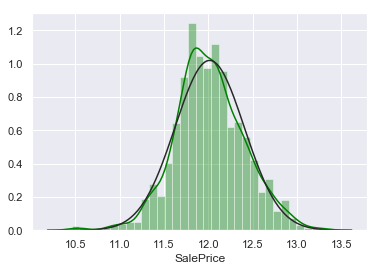

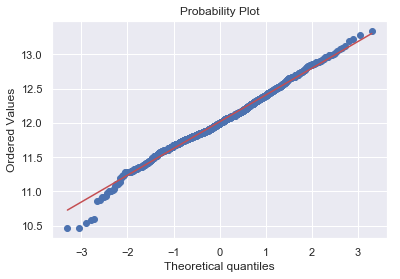

In [148]:
train['SalePrice']= np.log1p(train['SalePrice'])
sns.distplot(train['SalePrice'], fit = norm, color = 'green')
fig = plt.figure()
res = stats.probplot(train['SalePrice'],plot = plt)

In [149]:
#missing data
total = train.isnull().sum().sort_values(ascending = False)

percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending = False)

missing_data = pd.concat([total,percent], axis = 1, keys = ['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1439,0.996537
MiscFeature,1392,0.963989
Alley,1353,0.936981
Fence,1165,0.806787
FireplaceQu,690,0.477839
LotFrontage,252,0.174515
GarageCond,81,0.056094
GarageType,81,0.056094
GarageYrBlt,81,0.056094
GarageFinish,81,0.056094


In [150]:
categorical_variables = train.select_dtypes(exclude=[np.number])
categorical_variables.describe()

##for c in categoricals.columns:##
    #print('{:<14}'.format(c), train[c].unique())##

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1444,1444,91,1444,1444,1444,1444,1444,1444,1444,...,1363,1363,1363,1363,1444,5,279,52,1444,1444
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Fa,MnPrv,Shed,WD,Normal
freq,1135,1439,50,922,1301,1443,1044,1370,225,1247,...,855,604,1295,1310,1324,2,155,47,1255,1188


In [151]:
#feature_engineering

columns = ('MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition')

for i in columns:
    lbl = LabelEncoder() 
    lbl.fit(list(train[i].values)) 
    train[i] = lbl.transform(list(train[i].values))
    lbl.fit(list(test[i].values)) 
    test[i] = lbl.transform(list(test[i].values))

In [152]:
#preparing for model fitting
train=train.drop(columns=['Street', 'Utilities', 'Condition2', 'RoofMatl', 'Heating', 'PoolQC'])
test=test.drop(columns=['Street', 'Utilities', 'Condition2', 'RoofMatl', 'Heating', 'PoolQC'])

In [154]:
train = train.dropna(thresh=0.70*len(train), axis=1)
test = test.dropna(thresh=0.70*len(test), axis=1)

data = train.select_dtypes(include=[np.number]).interpolate().dropna()

In [155]:
y = train.SalePrice
X = data.drop(['SalePrice','Id'], axis =1)

In [156]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,  random_state =1)

In [160]:
#Linear Regression
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


lm = linear_model.LinearRegression()

lm.fit(X_train, y_train)

y_pred = lm.predict(X_test)
print('The accuracy of the Linear Regression is',r2_score(y_test,y_pred))
print ('RMSE is: ', mean_squared_error(y_test, y_pred))

submission = pd.DataFrame()
submission['Id'] = test.Id

feats = test.select_dtypes(
        include=[np.number]).drop(['Id'], axis=1).interpolate()

predictions = lm.predict(feats)

lm_predictions = np.exp(predictions)


print ("Original predictions are: \n", predictions[:5], "\n")
print ("Final predictions are: \n", lm_predictions[:5])

submission['SalePrice'] = lm_predictions
submission.head()

submission.to_csv('Linear Regression.csv', index=False)

The accuracy of the Linear Regression is 0.9107009439162502
RMSE is:  0.013041771943923437
Original predictions are: 
 [11.69858722 11.96874007 12.08159589 12.17815694 12.12855545] 

Final predictions are: 
 [120401.4939401  157745.78681846 176591.75779863 194494.06680917
 185082.22272432]


In [163]:
lambda_values = [0.00001, 0.0001, 0.001, 0.005, 0.01, 0.03, 10, 30, 50, 100, 150, 300, 500, 1001]

from sklearn.linear_model import Lasso

def train_lasso(X, Y, alpha):
    lasso = Lasso(alpha=alpha, max_iter=1000)
    lasso = lasso.fit(X, Y)
    return lasso
lasso_models = []

for alpha in lambda_values:
    l = train_lasso(X_train, y_train, alpha)
    lasso_models.append(l)
    
for i, alpha in enumerate(lambda_values):
    print('Lambda value: ',alpha)
    y_pred_lasso = lasso_models[i].predict(X_test)
    print('The accuracy of the Lasso Regression is',r2_score(y_test,y_pred_lasso))
    print ('RMSE is: ', mean_squared_error(y_test, y_pred_lasso))
    print('\n')
    
    submission = pd.DataFrame()
submission['Id'] = test.Id


features = test.select_dtypes(
        include=[np.number]).drop(['Id'], axis=1).interpolate()

lasso_predictions = lasso_models[1].predict(features)
final_lasso = np.exp(lasso_predictions)

print ("Original predictions are: \n", lasso_predictions[:5], "\n")
print ("Final lasso predictions are: \n", final_lasso[:5])

submission['SalePrice'] = final_lasso
submission.head()

submission.to_csv('lasso.csv', index=False)

Lambda value:  1e-05
The accuracy of the Lasso Regression is 0.9107420459625407
RMSE is:  0.013035769153550755


Lambda value:  0.0001
The accuracy of the Lasso Regression is 0.9110877816435831
RMSE is:  0.012985275832537346


Lambda value:  0.001
The accuracy of the Lasso Regression is 0.9118794413729147
RMSE is:  0.012869657077984695


Lambda value:  0.005
The accuracy of the Lasso Regression is 0.9050426450344857
RMSE is:  0.013868143989080567


Lambda value:  0.01
The accuracy of the Lasso Regression is 0.8996232224334989
RMSE is:  0.014659629103587582


Lambda value:  0.03
The accuracy of the Lasso Regression is 0.8684290657864263
RMSE is:  0.01921541160360189


Lambda value:  10
The accuracy of the Lasso Regression is 0.7256152674583922
RMSE is:  0.0400727987913555


Lambda value:  30
The accuracy of the Lasso Regression is 0.6206903230470642
RMSE is:  0.055396669571781375


Lambda value:  50
The accuracy of the Lasso Regression is 0.5357059788627392
RMSE is:  0.06780829500504904

In [164]:
submission['SalePrice'] = final_lasso
submission.head()

,Id,SalePrice
0,1461,120704.501359
1,1462,157107.302545
2,1463,176661.043898
3,1464,194588.267883
4,1465,185084.612793
